# Họ và Tên: Nguyễn Chấn Hưng
# MSSV: 207CT10099

## Câu 1 (2 điểm) Chọn một ảnh bất kỳ (tự đặt tên, ví dụ `pic1.jpg`) và thực hiện:

- Làm mờ ảnh bằng box filter. (0.5 điểm)  
- Áp dụng Laplacian để phát hiện biên. (0.5 điểm)  
- Chuyển đổi ảnh sang ảnh âm bản (negative). (0.5 điểm)  
- Chuyển sang không gian màu HSV và lưu 3 kênh H, S, V riêng biệt.  lưu thành ảnh grayscale tương ứng (`[ten_anh]_L.jpg`, `[ten_anh]_A.jpg`, `[ten_anh]_B.jpg`). (0.5 điểm) (0.5 điểm)


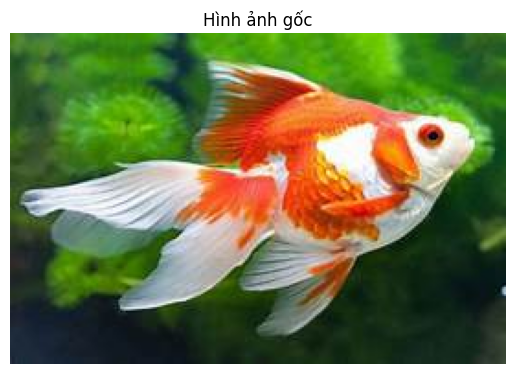

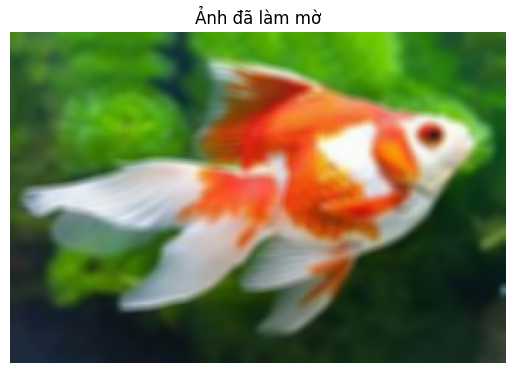

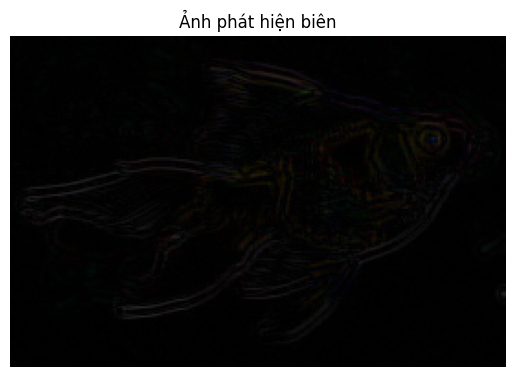

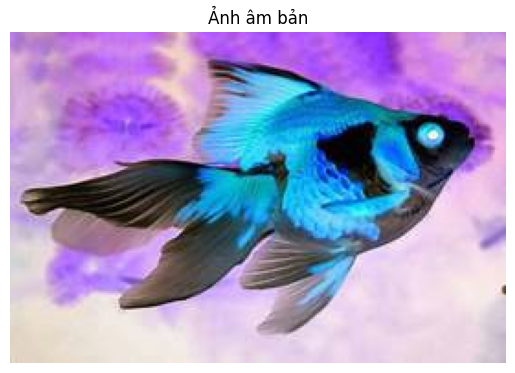

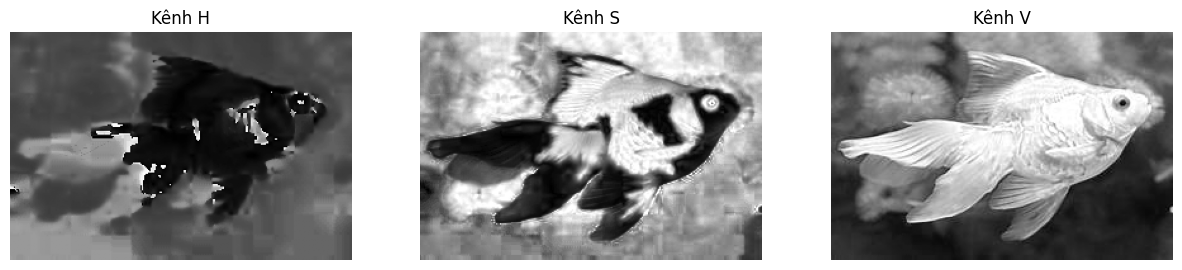

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh
img = cv2.imread('a.jpg')

# Hiển thị hình ảnh gốc
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Hình ảnh gốc')
plt.axis('off')
plt.show()

# Làm mờ ảnh bằng Box Filter
blurred_img = cv2.boxFilter(img, ddepth=-1, ksize=(5, 5))

# Lưu ảnh đã làm mờ
cv2.imwrite('result_img_c1/a_blurred.jpg', blurred_img)

plt.imshow(cv2.cvtColor(blurred_img, cv2.COLOR_BGR2RGB))
plt.title('Ảnh đã làm mờ')
plt.axis('off')
plt.show()

# Laplacian phát hiện biên
laplacian_img = cv2.Laplacian(blurred_img, cv2.CV_64F)
laplacian_img = cv2.convertScaleAbs(laplacian_img)

# Lưu ảnh phát hiện biên
cv2.imwrite('result_img_c1/a_laplacian.jpg', laplacian_img)

plt.imshow(laplacian_img, cmap='gray')
plt.title('Ảnh phát hiện biên')
plt.axis('off')
plt.show()

# Chuyển đổi ảnh sang ảnh âm bản
negative_img = cv2.bitwise_not(img)

# Lưu ảnh âm bản
cv2.imwrite('result_img_c1/a_negative.jpg', negative_img)

plt.imshow(cv2.cvtColor(negative_img, cv2.COLOR_BGR2RGB))
plt.title('Ảnh âm bản')
plt.axis('off')
plt.show()

# Không gian màu HSV
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h_channel, s_channel, v_channel = cv2.split(hsv_img)

# Lưu các kênh H, S, V
cv2.imwrite('result_img_c1/a_H.jpg', h_channel)
cv2.imwrite('result_img_c1/a_S.jpg', s_channel)
cv2.imwrite('result_img_c1/a_V.jpg', v_channel)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(h_channel, cmap='gray')
plt.title('Kênh H')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(s_channel, cmap='gray')
plt.title('Kênh S')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(v_channel, cmap='gray')
plt.title('Kênh V')
plt.axis('off')

plt.show()

### Câu 2 (4 điểm) Viết một chương trình Python sử dụng OpenCV để tạo menu tương tác cho phép người dùng chọn các kỹ thuật chuyển đổi không gian màu và xử lý ảnh nâng cao từ một danh sách, áp dụng đồng thời cho nhiều ảnh.

### Yêu cầu:

1. Menu gồm:  
* Chuyển sang ảnh xám (Grayscale) (0.5 điểm)  
* Chuyển sang HSV (0.5 điểm)  
* Chuyển sang LAB (0.5 điểm)  
* Cân bằng histogram (0.5 điểm)  
* Adaptive Thresholding (tham số ngẫu nhiên) (0.5 điểm)  
* CLAHE (Contrast Limited Adaptive Histogram Equalization) (0.5 điểm)

2. Chương trình xử lý đồng thời 3 ảnh bất kỳ do sinh viên tự chọn (có thể chọn bằng đường dẫn file hoặc nhập tên ảnh tùy ý). (0.5 điểm)

3. Phím tương ứng để kích hoạt các phương pháp xử lý:  
* G: Grayscale  
* H: HSV  
* L: LAB  
* Q: Histogram Equalization  
* A: Adaptive Threshold  
* C: CLAHE (0.5 điểm)

4. Lưu file kết quả với định dạng: `result_[phương pháp]_[tên ảnh gốc].jpg`  
   Ví dụ: `result_gray_flower.jpg`, `result_clahe_img1.jpg` (0.5 điểm)


In [3]:
import cv2
import numpy as np
import os

def display_menu():
    print("Menu:")
    print("G: Chuyển sang ảnh xám (Grayscale)")
    print("H: Chuyển sang HSV")
    print("L: Chuyển sang LAB")
    print("Q: Cân bằng histogram")
    print("A: Adaptive Thresholding")
    print("C: CLAHE")
    print("X: Thoát")

def process_images(images, choice):
    for img_path in images:
        img = cv2.imread(img_path)
        filename = os.path.basename(img_path)
        
        if choice == 'G':
            result = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            cv2.imwrite(f'result_img_c2/result_gray_{filename}', result)

        elif choice == 'H':
            result = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
            cv2.imwrite(f'result_img_c2/result_hsv_{filename}', result)

        elif choice == 'L':
            result = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)
            cv2.imwrite(f'result_img_c2/result_lab_{filename}', result)

        elif choice == 'Q':
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            result = cv2.equalizeHist(gray_img)
            cv2.imwrite(f'result_img_c2/result_histogram_{filename}', result)

        elif choice == 'A':
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            adaptive_threshold = cv2.adaptiveThreshold(gray_img, 255, 
                                                       cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                                       cv2.THRESH_BINARY, 11, 2)
            cv2.imwrite(f'result_img_c2/result_adaptive_{filename}', adaptive_threshold)

        elif choice == 'C':
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
            clahe_img = clahe.apply(gray_img)
            cv2.imwrite(f'result_img_c2/result_clahe_{filename}', clahe_img)

        print(f"Đã xử lý và lưu ảnh: result_{choice.lower()}_{filename}")

if __name__ == "__main__":
    images = ['a.jpg', 'b.jpg', 'c.jpg']
    while True:
        display_menu()
        choice = input("Chọn phương pháp xử lý (hoặc X để thoát): ").upper()

        if choice == 'X':
            break
        
        if choice in ['G', 'H', 'L', 'Q', 'A', 'C']:
            process_images(images, choice)
        else:
            print("Lựa chọn không hợp lệ. Vui lòng thử lại.")

Menu:
G: Chuyển sang ảnh xám (Grayscale)
H: Chuyển sang HSV
L: Chuyển sang LAB
Q: Cân bằng histogram
A: Adaptive Thresholding
C: CLAHE
X: Thoát
Đã xử lý và lưu ảnh: result_g_a.jpg
Đã xử lý và lưu ảnh: result_g_b.jpg
Đã xử lý và lưu ảnh: result_g_c.jpg
Menu:
G: Chuyển sang ảnh xám (Grayscale)
H: Chuyển sang HSV
L: Chuyển sang LAB
Q: Cân bằng histogram
A: Adaptive Thresholding
C: CLAHE
X: Thoát
Đã xử lý và lưu ảnh: result_h_a.jpg
Đã xử lý và lưu ảnh: result_h_b.jpg
Đã xử lý và lưu ảnh: result_h_c.jpg
Menu:
G: Chuyển sang ảnh xám (Grayscale)
H: Chuyển sang HSV
L: Chuyển sang LAB
Q: Cân bằng histogram
A: Adaptive Thresholding
C: CLAHE
X: Thoát
Đã xử lý và lưu ảnh: result_l_a.jpg
Đã xử lý và lưu ảnh: result_l_b.jpg
Đã xử lý và lưu ảnh: result_l_c.jpg
Menu:
G: Chuyển sang ảnh xám (Grayscale)
H: Chuyển sang HSV
L: Chuyển sang LAB
Q: Cân bằng histogram
A: Adaptive Thresholding
C: CLAHE
X: Thoát
Đã xử lý và lưu ảnh: result_q_a.jpg
Đã xử lý và lưu ảnh: result_q_b.jpg
Đã xử lý và lưu ảnh: result_

### Câu 3 (4 điểm) Viết một chương trình Python để xử lý 3 ảnh bất kỳ do sinh viên tự chọn.

* Cắt ảnh đầu tiên theo tỉ lệ 80% ở giữa. (0.5 điểm)  
* Xoay ảnh thứ hai 90 độ và lật dọc. (0.5 điểm)  
* Thu nhỏ ảnh thứ ba xuống 1/3 kích thước ban đầu và áp dụng Median Blur với kernel 7x7. (1.5 điểm)  
* Thay đổi độ sáng và độ tương phản ảnh thứ ba theo công thức:

$$
I_{out}(x, y) = \alpha \cdot I_{in}(x, y) + \beta
$$

Trong đó:  

$$
\alpha \in [0.7, 1.8], \quad \beta \in [-40, 40]
$$

Giá trị đầu ra cần được giới hạn trong khoảng [0, 255] bằng công thức:

$$
I_{out}(x, y) = \text{clip}(I_{out}(x, y), 0, 255)
$$


In [4]:
import cv2
import numpy as np

def process_image1(image_path):
    img = cv2.imread(image_path)
    height, width = img.shape[:2]
    
    # Cắt ảnh theo tỉ lệ 80% ở giữa
    start_row = int(height * 0.1)
    end_row = int(height * 0.9)
    cropped_img = img[start_row:end_row, :]
    
    cv2.imwrite('result_img_c3/processed_image1.jpg', cropped_img)
    print("Đã cắt ảnh đầu tiên và lưu thành 'processed_image1.jpg'.")

def process_image2(image_path):
    img = cv2.imread(image_path)
    
    # Xoay 90 độ và lật dọc
    rotated_img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    flipped_img = cv2.flip(rotated_img, 0)  # Lật dọc
    
    cv2.imwrite('result_img_c3/processed_image2.jpg', flipped_img)
    print("Đã xử lý ảnh thứ hai và lưu thành 'processed_image2.jpg'.")

def process_image3(image_path):
    img = cv2.imread(image_path)
    
    # Thu nhỏ ảnh xuống 1/3 kích thước ban đầu
    small_img = cv2.resize(img, (img.shape[1] // 3, img.shape[0] // 3))
    
    # Áp dụng Median Blur với kernel 7x7
    blurred_img = cv2.medianBlur(small_img, 7)
    
    cv2.imwrite('result_img_c3/processed_image3.jpg', blurred_img)
    print("Đã xử lý ảnh thứ ba và lưu thành 'processed_image3.jpg'.")

if __name__ == "__main__":
    # Đường dẫn tới các ảnh
    image1_path = 'a.jpg'
    image2_path = 'b.jpg'
    image3_path = 'c.jpg'
    
    process_image1(image1_path)
    process_image2(image2_path)
    process_image3(image3_path)

Đã cắt ảnh đầu tiên và lưu thành 'processed_image1.jpg'.
Đã xử lý ảnh thứ hai và lưu thành 'processed_image2.jpg'.
Đã xử lý ảnh thứ ba và lưu thành 'processed_image3.jpg'.


# Chúc các bạn làm bài may mắn, hi vọng mọi người qua môn tất cả được 10.